In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 

### Loading Dataset

In [2]:
df=pd.read_csv('C:/Users/aunik/Desktop/titanic.csv')
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Age Analysis

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
df['Age_Labelled']=df['Age'].apply(lambda x:"Child" if x<15 else ("Middle_Aged" if x>15 and x<50 else "Old"))

### Created temporary dataframe for plotting purposes

In [7]:
Age_df=df.groupby('Age_Labelled').agg({'Survived':['sum','count','mean']}).reset_index().droplevel(0,axis=1)
Age_df.columns=['Age_Type','#Survived','#Travellers','%Survivors']
Age_df

,Age_Type,#Survived,#Travellers,%Survivors
0,Child,45,78,0.576923
1,Middle_Aged,214,557,0.384201
2,Old,83,256,0.324219


In [8]:
Age_df['#Died']=Age_df['#Travellers']-Age_df['#Survived']
Age_df['%Died']=Age_df['#Died']/Age_df['#Travellers']
Age_df

,Age_Type,#Survived,#Travellers,%Survivors,#Died,%Died
0,Child,45,78,0.576923,33,0.423077
1,Middle_Aged,214,557,0.384201,343,0.615799
2,Old,83,256,0.324219,173,0.675781


## Density plot and histogram plots to see the frequency of travellers based on Fare

ModuleNotFoundError: No module named 'scipy'

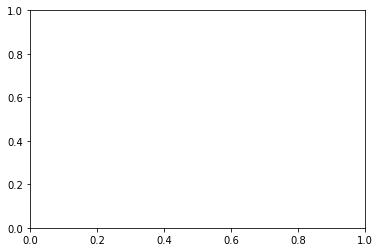

In [9]:
df[['Fare']].plot(kind='density',xlim=[-10,100])

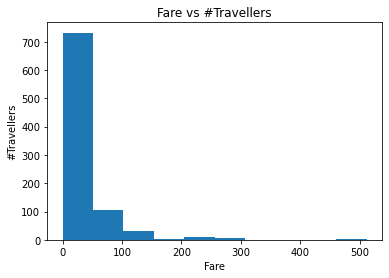

In [ ]:
plt.hist(df['Fare'])
plt.title('Fare vs #Travellers') 
plt.xlabel("Fare")
plt.ylabel("#Travellers")
plt.show()

## Bar plot and line plot to see if the curve is monotonic in any sense

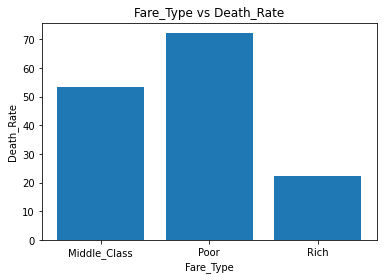

In [ ]:
plt.bar(Fare_df['Fare_Type'], 100*Fare_df['%Died'],)
plt.title('Fare_Type vs Death_Rate') 
plt.xlabel("Fare_Type")
plt.ylabel("Death_Rate")
plt.xticks(x,values)
plt.show()

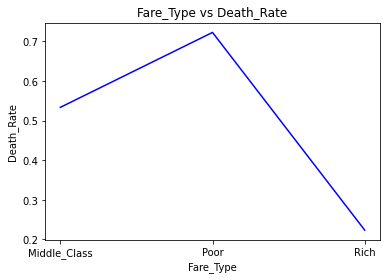

In [ ]:
plt.plot(Fare_df['Fare_Type'],Fare_df['%Died'], color ='blue')
plt.title('Fare_Type vs Death_Rate') 
plt.xlabel("Fare_Type")
plt.ylabel("Death_Rate")
plt.show()

From this, even though there are more number of travellers in middle aged than children the death rate is still high which proves that age is a good differentiator for survival
Number of old people travelling is more than children but less than middle aged , but their death rate is the highest.
Putting it all together, More the age more was the chance for someone to die.

# Sex Analysis

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Created temporary dataframe for plotting purposes

In [ ]:
Sex_df=df.groupby('Sex').agg({'Survived':['sum','count','mean']}).reset_index().droplevel(0,axis=1)
Sex_df.columns=['Sex','#Survived','#Travellers','%Survivors']
Sex_df

,Sex,#Survived,#Travellers,%Survivors
0,female,233,314,0.742038
1,male,109,577,0.188908


In [ ]:
Sex_df['#Died']=Sex_df['#Travellers']-Sex_df['#Survived']
Sex_df['%Died']=Sex_df['#Died']/Sex_df['#Travellers']
Sex_df

,Sex,#Survived,#Travellers,%Survivors,#Died,%Died
0,female,233,314,0.742038,81,0.257962
1,male,109,577,0.188908,468,0.811092


## Density plot and histogram plots to see the frequency of travellers based on Sex

<AxesSubplot:ylabel='Density'>

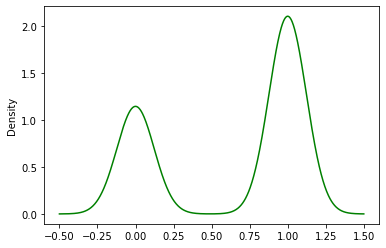

In [ ]:
df['Sex'].apply(lambda x:1 if x=='male' else 0).plot.density(color='green')

## 1 if male
## 0 if female

##The graph peaks at 0,1 but the peak at 1 is almost twice that of at 0 saying the density of male is almost double that of female

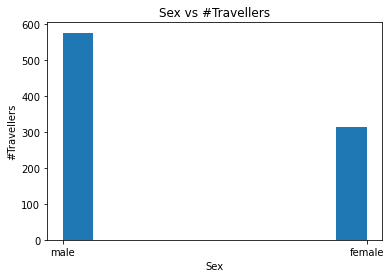

In [ ]:
plt.hist(df['Sex'])
plt.title('Sex vs #Travellers') 
plt.xlabel("Sex")
plt.ylabel("#Travellers")
plt.show()

## Bar plot and line plot to see if the curve is monotonic in any sense

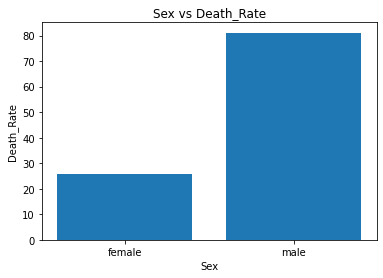

In [ ]:
plt.bar(Sex_df['Sex'], 100*Sex_df['%Died'])
plt.title('Sex vs Death_Rate') 
plt.xlabel("Sex")
plt.ylabel("Death_Rate")
plt.show()

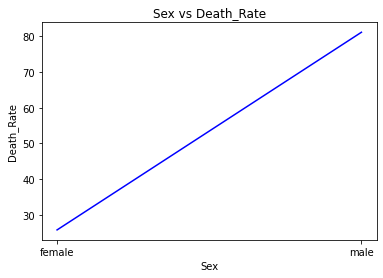

In [ ]:
plt.plot(Sex_df['Sex'],100*Sex_df['%Died'], color ='blue')
plt.title('Sex vs Death_Rate') 
plt.xlabel("Sex")
plt.ylabel("Death_Rate")
plt.show()

# Financial Status Analysis

### As we don't have a clear defined rich/poor segregation we will be using the fare price as a proxy to identify one's financial capability

In [ ]:
df['Fare'].quantile([0.1,0.3,0.5,0.7,0.9])

0.1     7.5500
0.3     8.0500
0.5    14.4542
0.7    27.0000
0.9    77.9583
Name: Fare, dtype: float64

In [ ]:
df['Fare'].mean()

32.2042079685746

In [ ]:
df['Fare_Labelled']=df['Fare'].apply(lambda x:"Poor" if x<20 else ("Middle_Class" if x>20 and x<80 else "Rich"))

In [ ]:
df['Fare_Labelled'].value_counts()

Poor            515
Middle_Class    300
Rich             76
Name: Fare_Labelled, dtype: int64

### Created temporary dataframe for plotting purposes

In [ ]:
Fare_df=df.groupby('Fare_Labelled').agg({'Survived':['sum','count','mean']}).reset_index().droplevel(0,axis=1)
Fare_df.columns=['Fare_Type','#Survived','#Travellers','%Survivors']
Fare_df

,Fare_Type,#Survived,#Travellers,%Survivors
0,Middle_Class,140,300,0.466667
1,Poor,143,515,0.277670
2,Rich,59,76,0.776316


In [ ]:
Fare_df['#Died']=Fare_df['#Travellers']-Fare_df['#Survived']
Fare_df['%Died']=Fare_df['#Died']/Fare_df['#Travellers']
Fare_df

,Fare_Type,#Survived,#Travellers,%Survivors,#Died,%Died
0,Middle_Class,140,300,0.466667,160,0.533333
1,Poor,143,515,0.277670,372,0.722330
2,Rich,59,76,0.776316,17,0.223684


## Density plot and histogram plots to see the frequency of travellers based on Age

<AxesSubplot:ylabel='Density'>

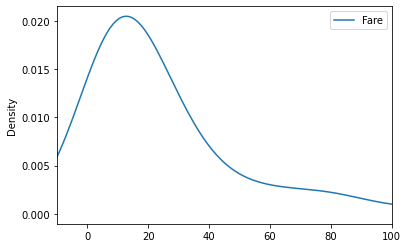

In [ ]:
df[['Fare']].plot(kind='density',xlim=[-10,100])

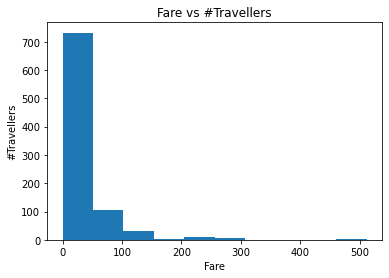

In [ ]:
plt.hist(df['Fare'])
plt.title('Fare vs #Travellers') 
plt.xlabel("Fare")
plt.ylabel("#Travellers")
plt.show()

## Bar plot and line plot to see if the curve is monotonic in any sense

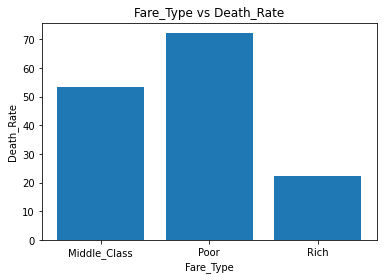

In [ ]:
plt.bar(Fare_df['Fare_Type'], 100*Fare_df['%Died'])
plt.title('Fare_Type vs Death_Rate') 
plt.xlabel("Fare_Type")
plt.ylabel("Death_Rate")
plt.show()

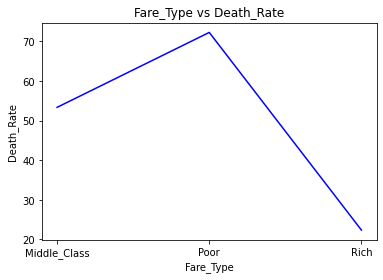

In [ ]:
plt.plot(Fare_df['Fare_Type'],100*Fare_df['%Died'], color ='blue')
plt.title('Fare_Type vs Death_Rate') 
plt.xlabel("Fare_Type")
plt.ylabel("Death_Rate")
plt.show()

# Conclusion

## All three "Fare","Age","Gender" are very strong indicators for predicting if someone could survive the titanic.